In [1]:
import numpy as np
import pandas as pd
import openpyxl
import matplotlib as mp
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RepeatedKFold
import seaborn as sns
from sklearn.metrics import classification_report
from scipy.stats import loguniform
from sklearn.ensemble import GradientBoostingClassifier
np.random.seed(42)

In [2]:
AA="C:/Users/ganes/oneDrive/Desktop/AI/FD/FDMCF.xlsx"
df=pd.read_excel(AA)
df.head(5)
df=pd.read_excel(AA)
df.head(5)
df.shape


(1544, 22)

In [3]:
A=df['Al2O3/Si']
B=df["B2O3/Si"]
C = df['BeO/Si']
D = df['Ga2O3/Si']
E = df["GeO2/Si"]
F=df['Li2O/Si']
G=df["K2O/Si"]
H = df['Na2O/Si']
I = df['Rb2O/Si']
J=df['Cs2O/Si']
K=df["SrO/Si"]
L = df['H2O/Si']
M=df['F/Si']
N= df['OSDA-1/Si']
O= df['OSDA-2/Si']
P=df["OH/Si"]
Q=df["Area-1"]
R=df["Area-2"]
S=df["T"]
T=df["t"]
U=df["rpm"]
List = [A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U]
List1=pd.concat(List, axis=1, sort=True)
List1.head(5)
List1.shape


(1544, 21)

In [4]:
from imblearn.over_sampling import SMOTE

In [5]:
from imblearn.over_sampling import SMOTE
X=List1
Y=df["FDCMC"]
Strategy = {0:346, 1:346, 2:346, 3:346, 4:346, 5:346, 6:346, 7:346, 7:346, 8:346, 9:346, 10:346, 11:346,12:346 }
OverSample=SMOTE(sampling_strategy=Strategy, k_neighbors=4)
X_OS, Y_OS = OverSample.fit_resample(X,Y)

train accuracy 0.9656637514557346
test accuracy 0.8986245978718139
train precision 0.9661375053316872
test precision 0.901490102484438
train recall 0.9656635875872828
test recall 0.8985972850678733
train f1 0.9654924482505175
test f1 0.8976654846939324
train               precision    recall  f1-score   support

           0       0.95      0.98      0.97       311
           1       1.00      1.00      1.00       312
           2       0.94      0.88      0.91       311
           3       0.97      1.00      0.98       311
           4       0.89      0.96      0.93       311
           5       0.99      0.98      0.99       311
           6       0.98      0.91      0.94       312
           7       0.93      0.96      0.94       312
           8       0.98      1.00      0.99       311
           9       0.94      0.90      0.92       312
          10       1.00      1.00      1.00       311
          11       1.00      1.00      1.00       312
          12       0.99      1.00     

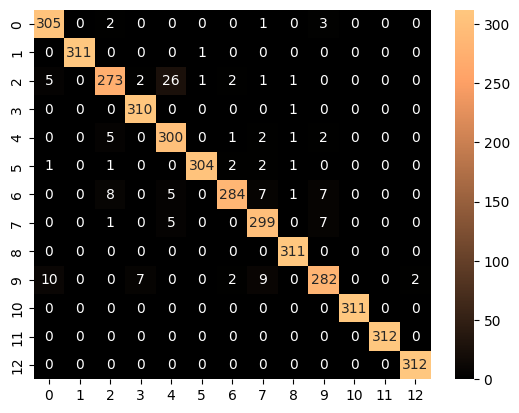

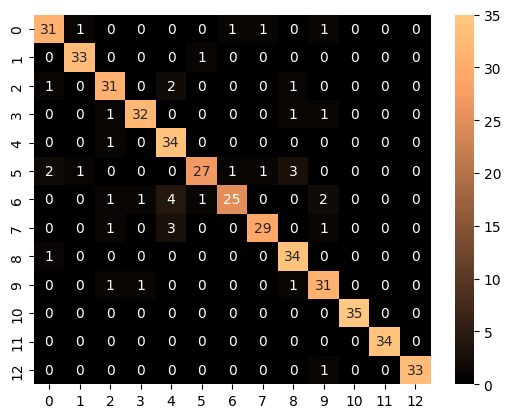

In [6]:
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_gbtrain=list()
mmc_gbtest=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    GB = GradientBoostingClassifier(random_state=1, )
    gb_model=GB.fit(X_Train, Y_Train)
    predict_gbtrain=GB.predict(X_Train)
    predict_gbtest=GB.predict(X_Test)  
    Acctrain = metrics.accuracy_score(Y_Train, predict_gbtrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_gbtest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_gbtrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_gbtest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_gbtrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_gbtest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_gbtrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_gbtest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_gbtrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_gbtest)
    mmc_train= metrics.matthews_corrcoef(Y_Train, predict_gbtrain)
    mmc_test= metrics.matthews_corrcoef(Y_Test, predict_gbtest)
    mmc_gbtrain.append(mmc_train)
    mmc_gbtest.append(mmc_test)
    
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_gbtrain))
print("test", metrics.classification_report(Y_Test, predict_gbtest))
print('Matthews correlation coefficient Train',mean(mmc_gbtrain))
print('Matthews correlation coefficient Test',mean(mmc_gbtest))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()



train accuracy 0.9919964440055956
test accuracy 0.9286369710467705
train precision 0.9920637185440517
test precision 0.9303457254968113
train recall 0.9919971682616995
test recall 0.9285972850678734
train f1 0.9919917110644725
test f1 0.9281235480876855
train               precision    recall  f1-score   support

           0       0.99      0.99      0.99       311
           1       1.00      1.00      1.00       312
           2       0.99      0.96      0.98       311
           3       1.00      1.00      1.00       311
           4       0.97      0.99      0.98       311
           5       1.00      1.00      1.00       311
           6       0.99      0.99      0.99       312
           7       0.98      0.99      0.99       312
           8       1.00      1.00      1.00       311
           9       0.98      0.98      0.98       312
          10       1.00      1.00      1.00       311
          11       1.00      1.00      1.00       312
          12       1.00      1.00    

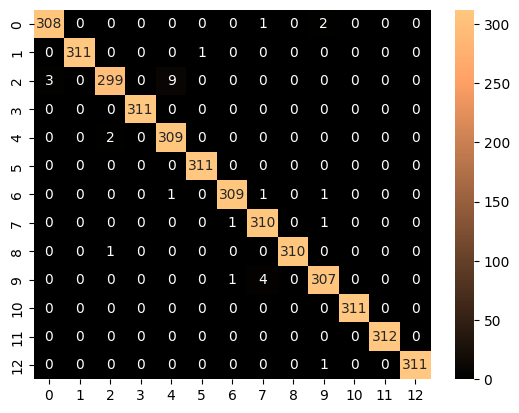

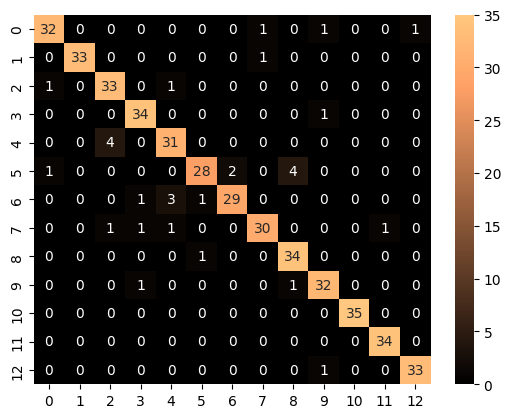

In [7]:
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_xgbtrain=list()
mmc_xgbtest=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    XGB = XGBClassifier( random_state=1, )
    xgb_model=XGB.fit(X_Train, Y_Train)
    predict_xgbtrain=XGB.predict(X_Train)
    predict_xgbtest=XGB.predict(X_Test)  
    Acctrain = metrics.accuracy_score(Y_Train, predict_xgbtrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_xgbtest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_xgbtrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_xgbtest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_xgbtrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_xgbtest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_xgbtrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_xgbtest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_xgbtrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_xgbtest)
    mmc_train= metrics.matthews_corrcoef(Y_Train, predict_xgbtrain)
    mmc_test= metrics.matthews_corrcoef(Y_Test, predict_xgbtest)
    mmc_xgbtrain.append(mmc_train)
    mmc_xgbtest.append(mmc_test)
    
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_xgbtrain))
print("test", metrics.classification_report(Y_Test, predict_xgbtest))
print('Matthews correlation coefficient Train',mean(mmc_xgbtrain))
print('Matthews correlation coefficient Test',mean(mmc_xgbtest))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()


100%|===================| 52619/52637 [50:23<00:01]        

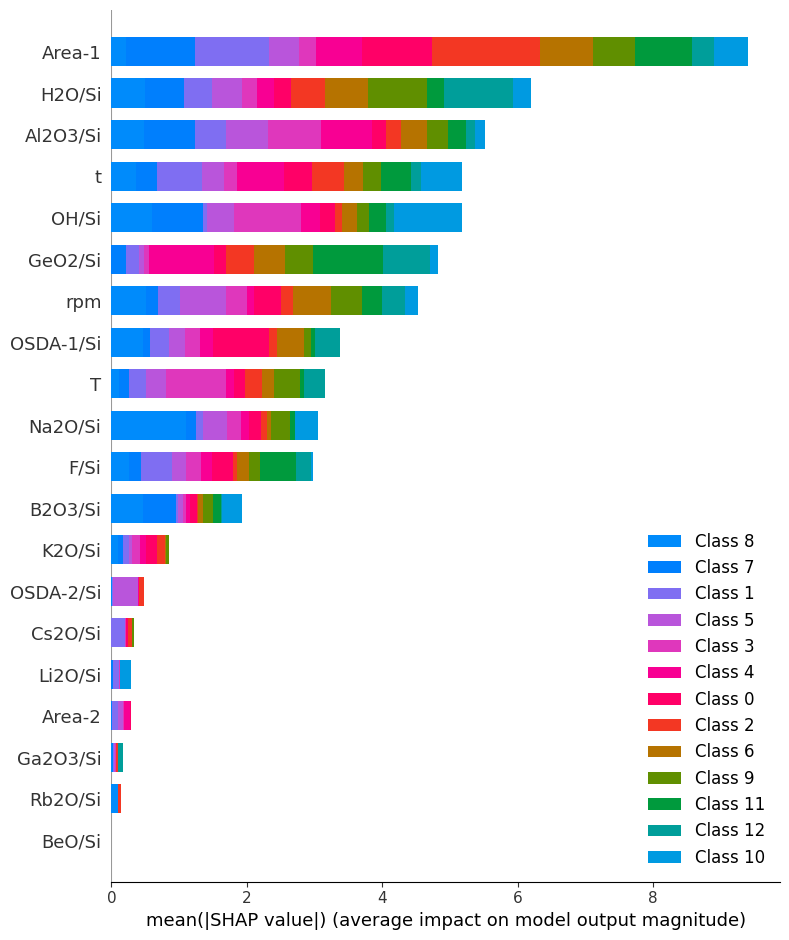

In [8]:
import shap
explainer = shap.TreeExplainer(XGB, X_Train)
shap_values_XGB = explainer.shap_values(X_Train)
shap.summary_plot(shap_values_XGB, X_Train, plot_type='bar')

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


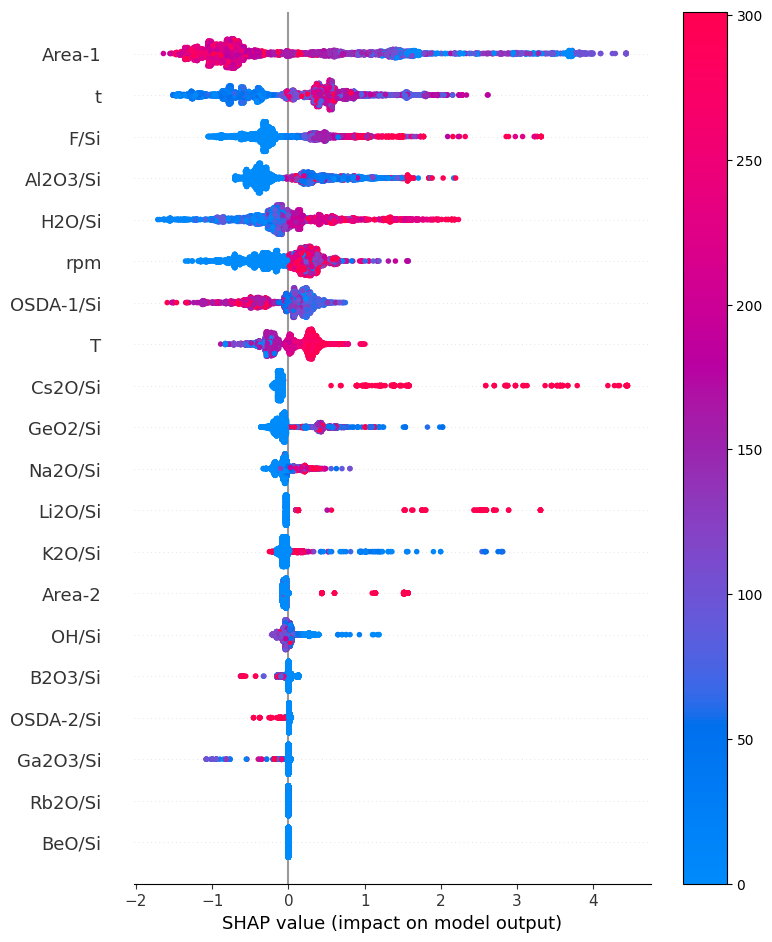

In [9]:
shap.summary_plot(shap_values_XGB[1], X_Train, show = False, color_bar = False,)
plt.colorbar()

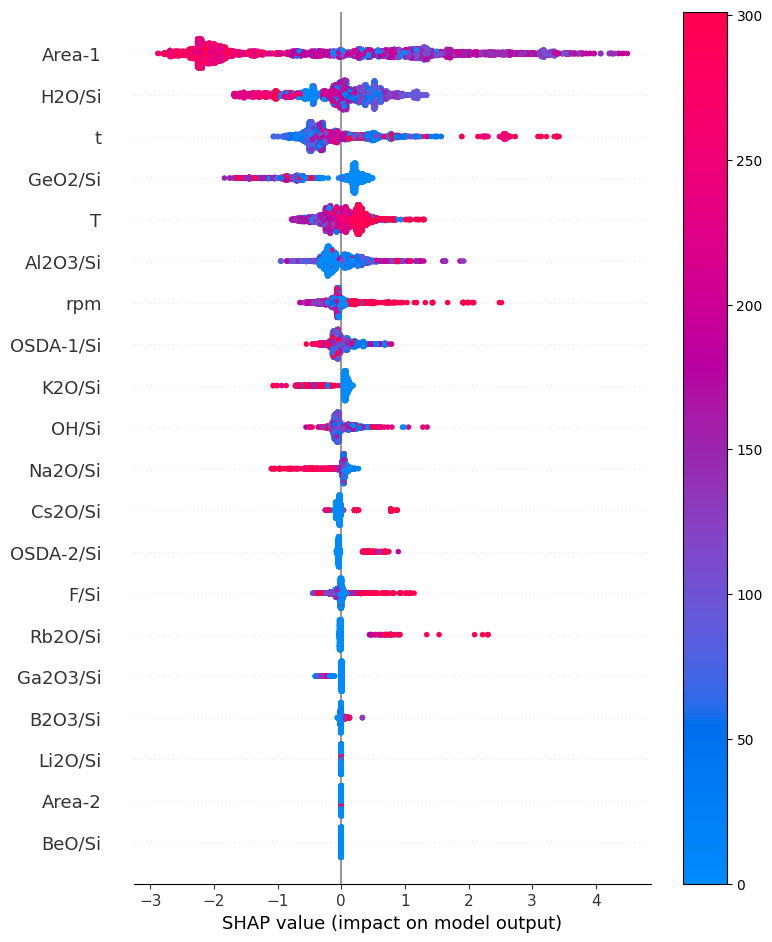

In [10]:
shap.summary_plot(shap_values_XGB[2], X_Train, show = False, color_bar = False,)
plt.colorbar()


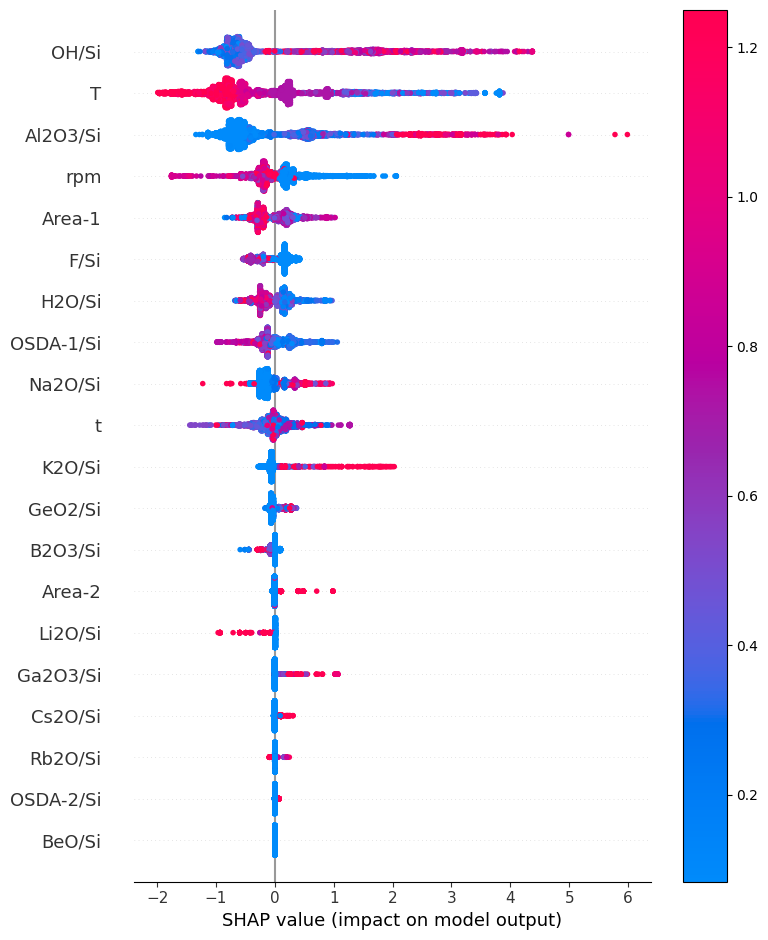

In [11]:
shap.summary_plot(shap_values_XGB[3], X_Train, show = False, color_bar = False,)
plt.colorbar()

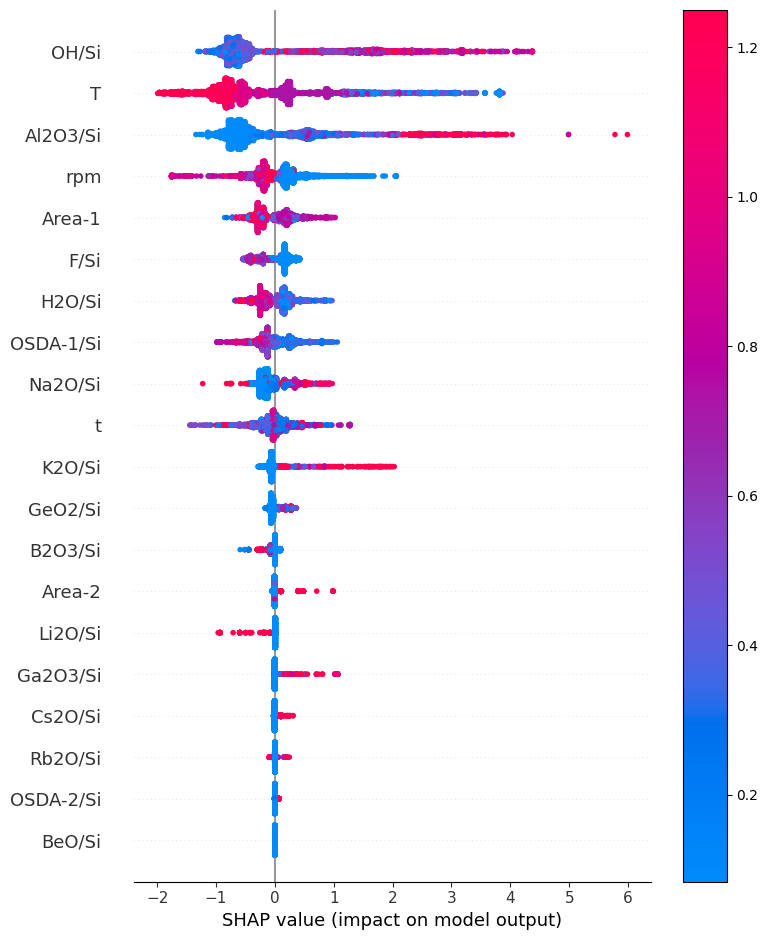

In [12]:
shap.summary_plot(shap_values_XGB[3], X_Train, show = False, color_bar = False,)
plt.colorbar()

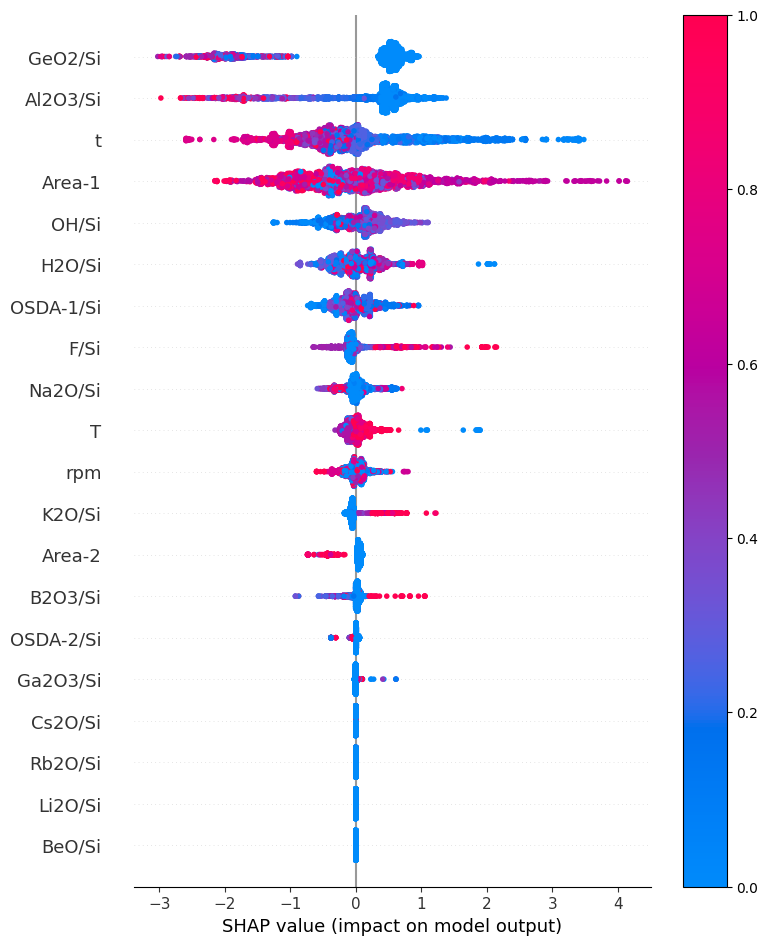

In [13]:
shap.summary_plot(shap_values_XGB[4], X_Train, show = False, color_bar = False,)
plt.colorbar()

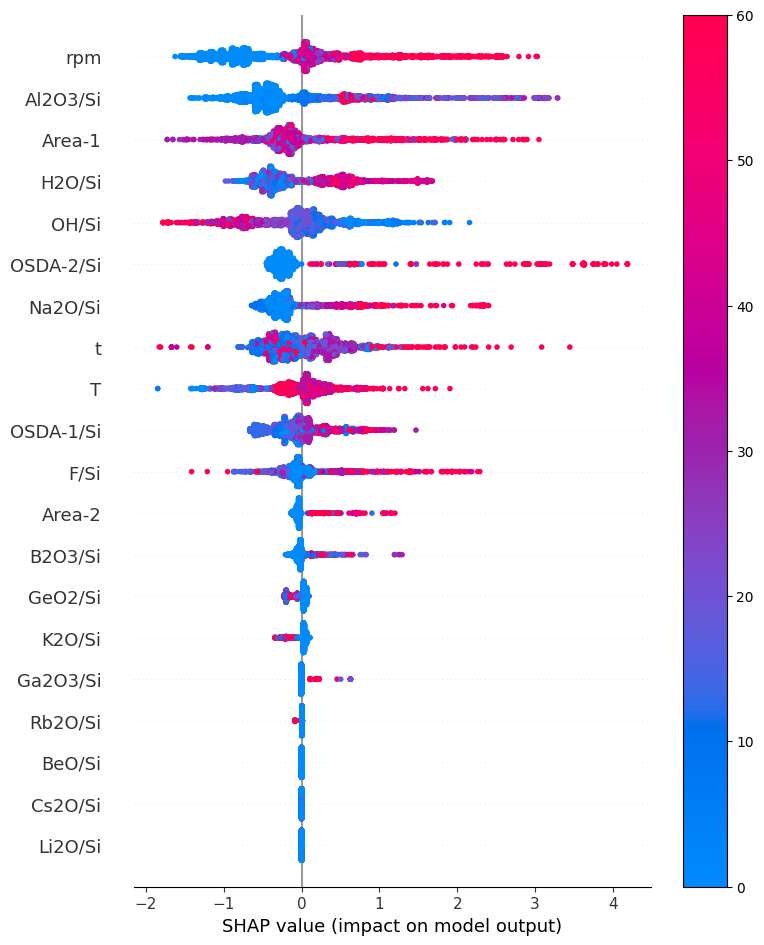

In [14]:
shap.summary_plot(shap_values_XGB[5], X_Train, show = False, color_bar = False,)
plt.colorbar()

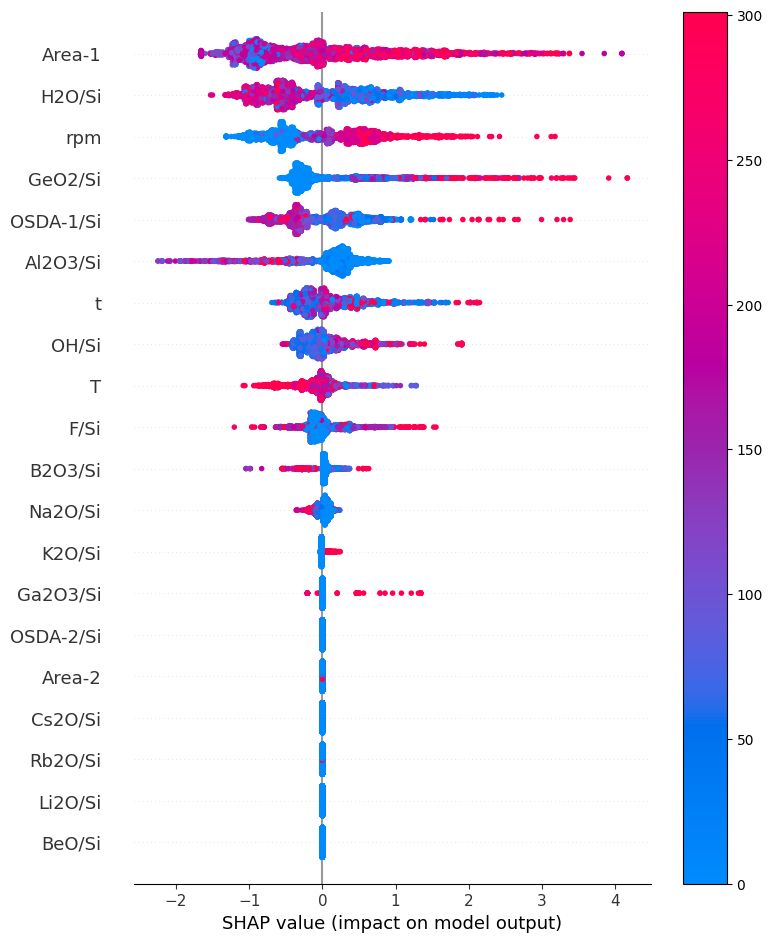

In [15]:
shap.summary_plot(shap_values_XGB[6], X_Train, show = False, color_bar = False,)
plt.colorbar()

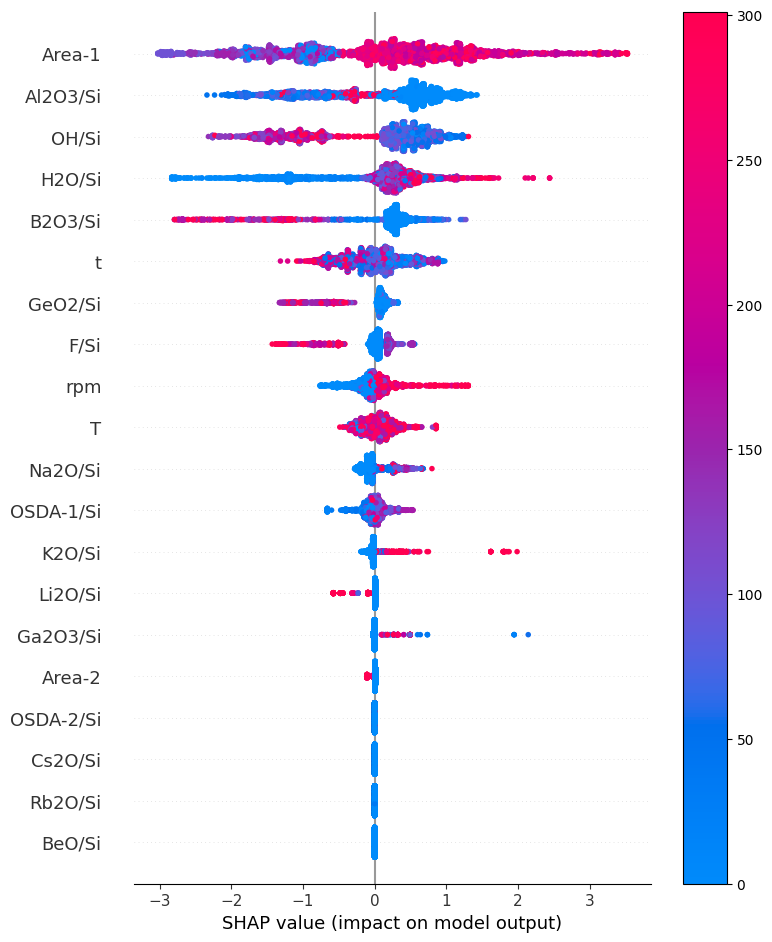

In [16]:
shap.summary_plot(shap_values_XGB[7], X_Train, show = False, color_bar = False,)
plt.colorbar()

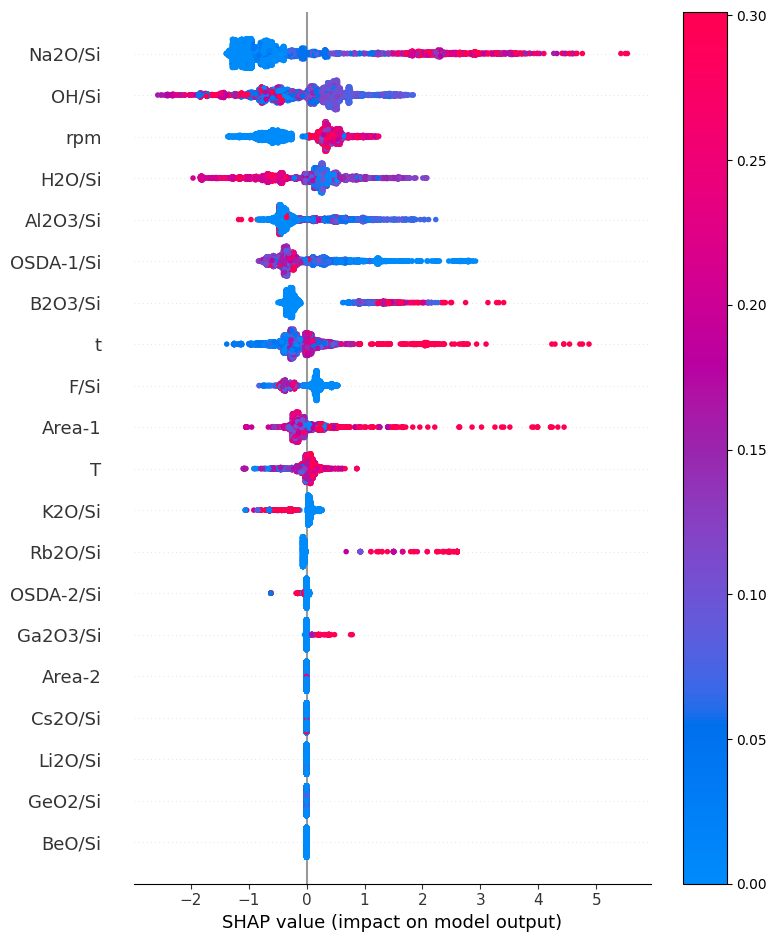

In [17]:
shap.summary_plot(shap_values_XGB[8], X_Train, show = False, color_bar = False,)
plt.colorbar()

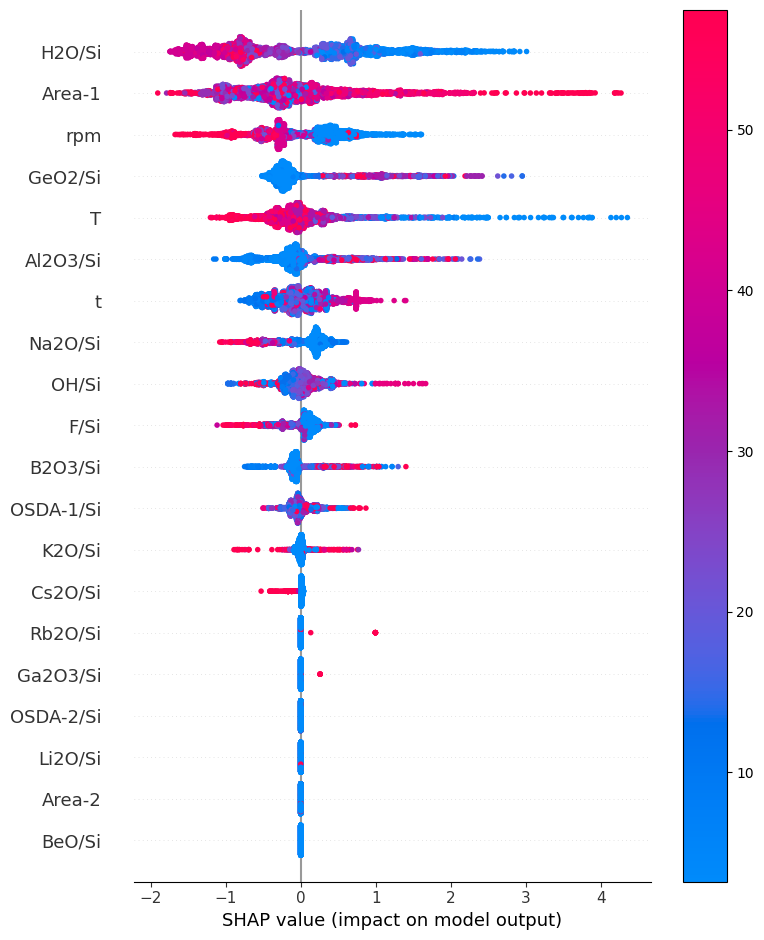

In [18]:
shap.summary_plot(shap_values_XGB[9], X_Train, show = False, color_bar = False,)
plt.colorbar()

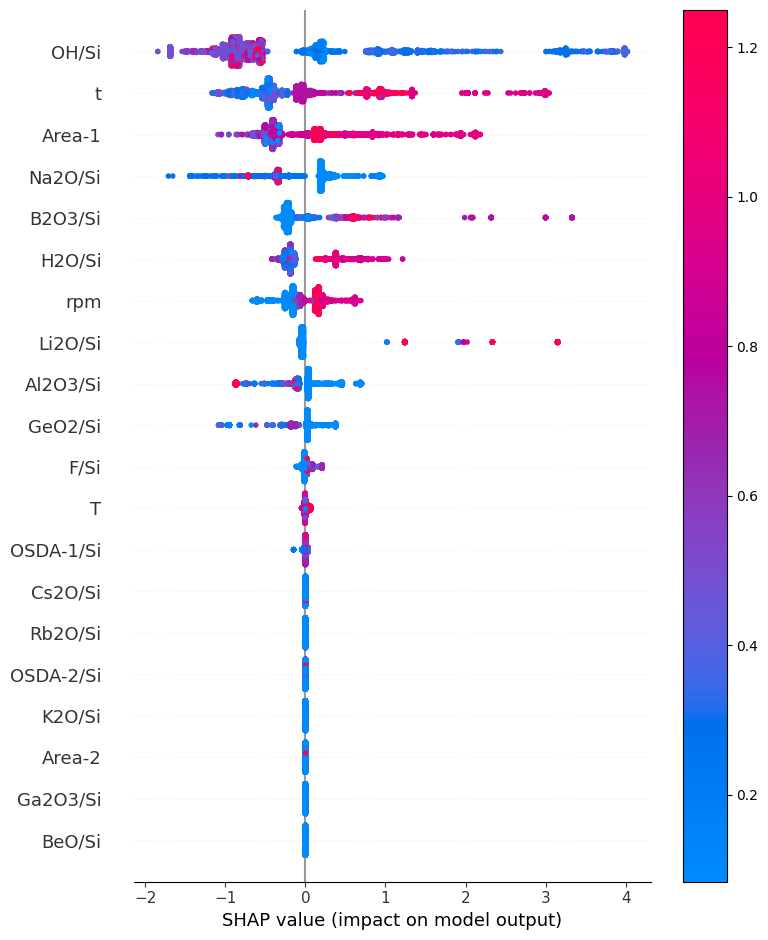

In [19]:
shap.summary_plot(shap_values_XGB[10], X_Train, show = False, color_bar = False,)
plt.colorbar()

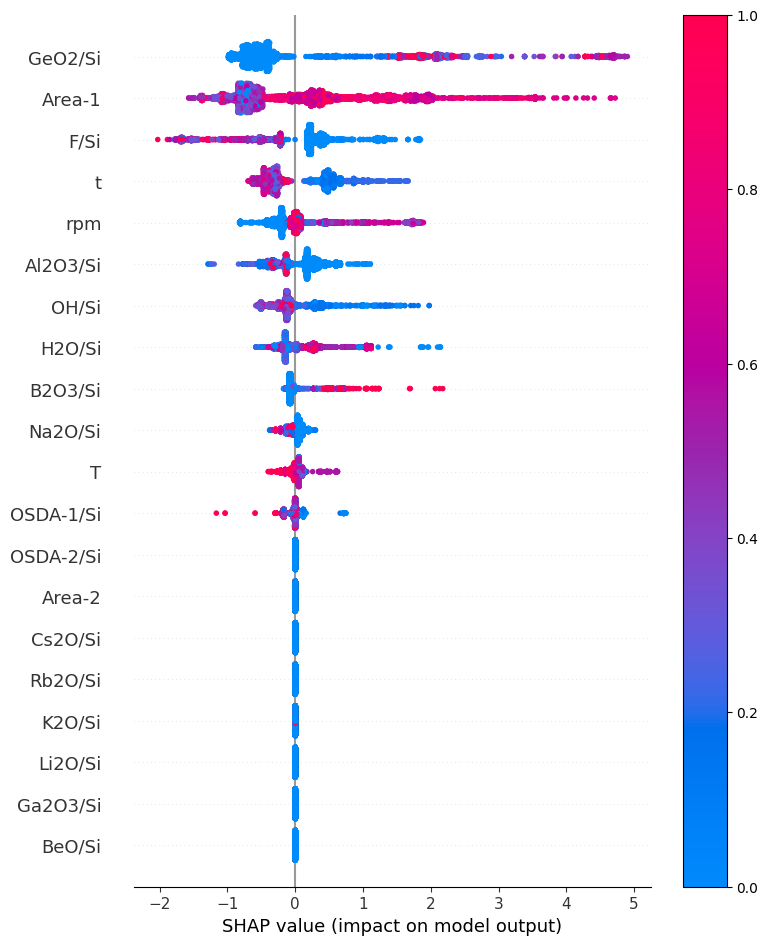

In [20]:
shap.summary_plot(shap_values_XGB[11], X_Train, show = False, color_bar = False,)
plt.colorbar()

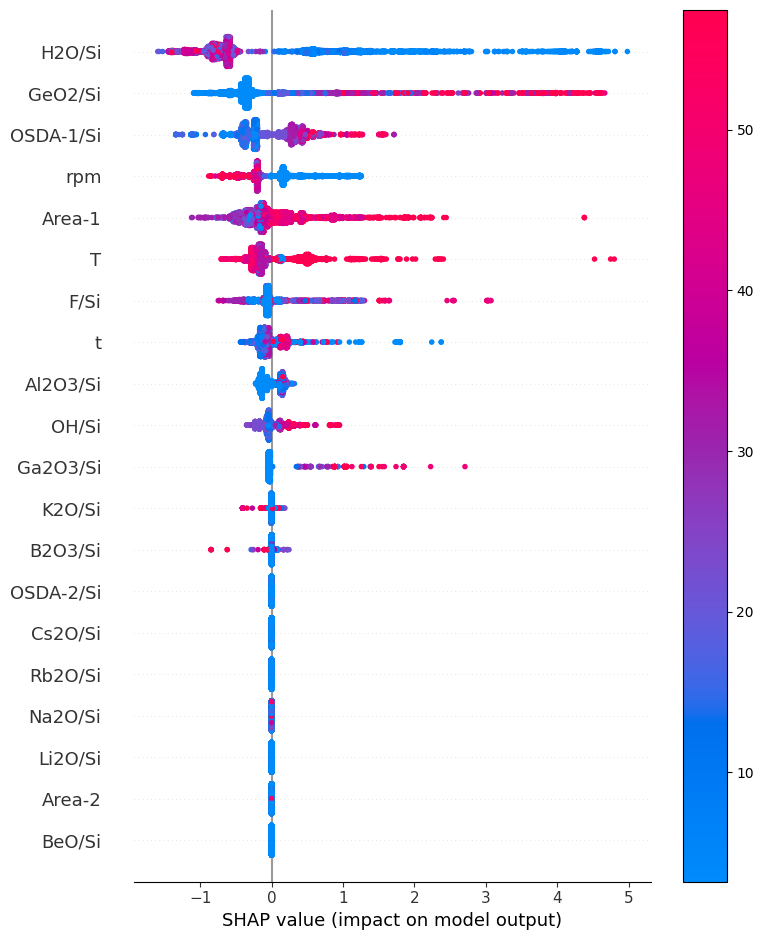

In [21]:
shap.summary_plot(shap_values_XGB[12], X_Train, show = False, color_bar = False,)
plt.colorbar()

train accuracy 0.9919964440055956
test accuracy 0.8983974263796091
train precision 0.9920306970523564
test precision 0.9003855867720517
train recall 0.9919962962258287
test recall 0.898338720103426
train f1 0.991992860431688
test f1 0.8978730263362829
train               precision    recall  f1-score   support

           0       0.98      1.00      0.99       311
           1       1.00      1.00      1.00       312
           2       0.98      0.97      0.98       311
           3       1.00      1.00      1.00       311
           4       0.98      0.98      0.98       311
           5       1.00      1.00      1.00       311
           6       0.99      0.99      0.99       312
           7       0.99      0.99      0.99       312
           8       1.00      1.00      1.00       311
           9       0.99      0.98      0.98       312
          10       1.00      1.00      1.00       311
          11       1.00      1.00      1.00       312
          12       1.00      1.00      

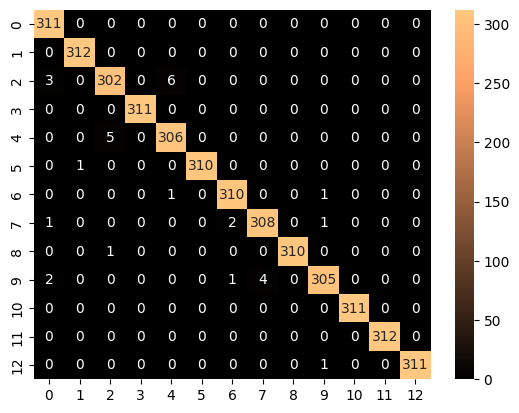

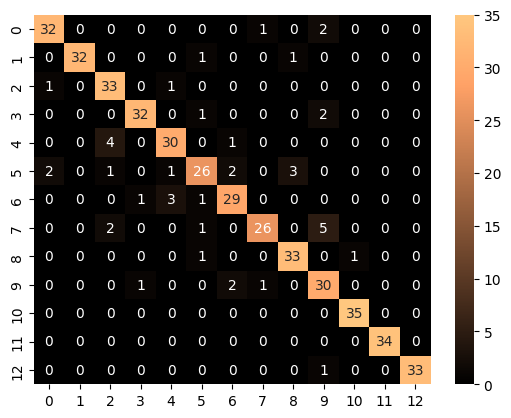

In [22]:
conf_matrix_Train =[] 
conf_matrix_Test=[] 
mmc_dttrain=list()
mmc_dttest=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv =StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    DT=DecisionTreeClassifier(random_state=1, criterion="entropy" )
    dt_model=DT.fit(X_Train,Y_Train)    
    predict_dttrain=DT.predict(X_Train)
    predict_dttest=DT.predict(X_Test)  
    Acctrain = metrics.accuracy_score(Y_Train, predict_dttrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_dttest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_dttrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_dttest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_dttrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_dttest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_dttrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_dttest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_dttrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_dttest)
    mmc_train= metrics.matthews_corrcoef(Y_Train, predict_dttrain)
    mmc_dttrain.append(mmc_train)
    mmc_test= metrics.matthews_corrcoef(Y_Test, predict_dttest)
    mmc_dttest.append(mmc_test)
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_dttrain))
print("test", metrics.classification_report(Y_Test, predict_dttest))
print('Matthews correlation coefficient Train',mean(mmc_dttrain))
print('Matthews correlation coefficient Test',mean(mmc_dttest))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()


In [23]:
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
from io import StringIO

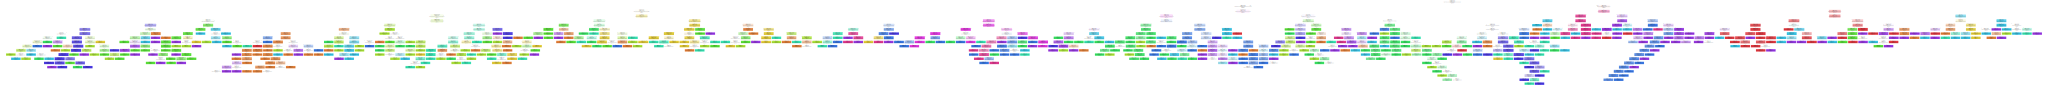

In [24]:
fn=["Al2O3/Si", 'B2O3/Si', 'BeO/Si', 'Ga2O3/Si', 'GeO2/Si', 'Li2O/Si', "K2O/Si", "Na2O/Si",
           "Rb2O/Si", "Cs2O/Si", "SrO/Si", "H2O/Si", "F/Si", "OSDA-1/Si", "OSDA-2/Si", "OH/Si",
           "Area-1", "Area-2", "T", "t", "rpm"]
cn=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]
dot_data = tree.export_graphviz(DT,  feature_names = fn, class_names=cn,  filled = True)
graph = graphviz.Source(dot_data, format="png") 
graph 

In [31]:
graph.render("FDALLCHANNELMC")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.42533 to fit


'FDALLCHANNELMC.png'

train accuracy 0.9919964440055956
test accuracy 0.9268542439990102
train precision 0.9920628767717344
test precision 0.9287112664362253
train recall 0.9919965340537935
test recall 0.9268131868131869
train f1 0.9919919687502687
test f1 0.9261265772917151
train               precision    recall  f1-score   support

           0       0.98      1.00      0.99       311
           1       1.00      1.00      1.00       312
           2       0.99      0.96      0.98       311
           3       1.00      1.00      1.00       311
           4       0.97      0.99      0.98       311
           5       1.00      1.00      1.00       311
           6       0.99      0.99      0.99       312
           7       0.98      0.99      0.99       312
           8       1.00      1.00      1.00       311
           9       0.99      0.97      0.98       312
          10       1.00      1.00      1.00       311
          11       1.00      1.00      1.00       312
          12       1.00      1.00    

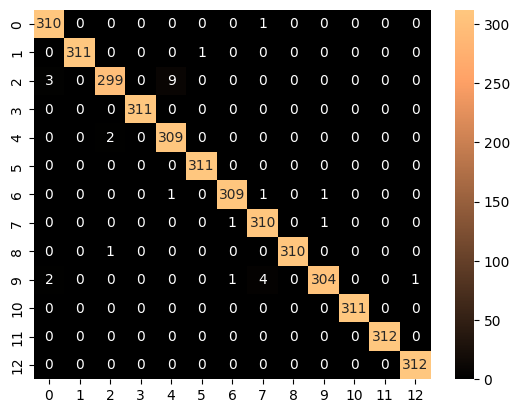

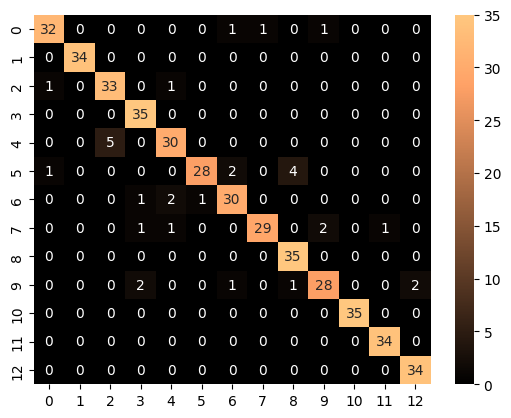

In [29]:
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_rftrain=list()
mmc_rftest=list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    RF=RandomForestClassifier(random_state=1,  )
    rf_model=RF.fit(X_Train,Y_Train)
    predict_RFTrain=RF.predict(X_Train)
    predict_RFTest=RF.predict(X_Test)
    Acctrain = metrics.accuracy_score(Y_Train, predict_RFTrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_RFTest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_RFTrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_RFTest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_RFTrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_RFTest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_RFTrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_RFTest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_RFTrain)
    conf_matrix_Train.append(conf_matrix1)
    conf_matrix2 = confusion_matrix(Y_Test, predict_RFTest)
    conf_matrix_Test.append(conf_matrix2)
    mmmc_train= metrics.matthews_corrcoef(Y_Train, predict_RFTrain)
    mmc_rftrain.append(mmc_train)
    mmc_test= metrics.matthews_corrcoef(Y_Test, predict_RFTest)
    mmc_rftest.append(mmc_test)
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_RFTrain))
print("test", metrics.classification_report(Y_Test, predict_RFTest)) 
print('Matthews correlation coefficient Train',mean(mmc_rftrain))
print('Matthews correlation coefficient Test',mean(mmc_rftest))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()


train accuracy 0.9919964440055956
test accuracy 0.929964860183123
train precision 0.9920306970523564
test precision 0.9312695240486205
train recall 0.9919962962258287
test recall 0.9299353587588882
train f1 0.991992860431688
test f1 0.9292224330808233
train               precision    recall  f1-score   support

           0       0.98      1.00      0.99       311
           1       1.00      1.00      1.00       312
           2       0.98      0.97      0.98       311
           3       1.00      1.00      1.00       311
           4       0.98      0.98      0.98       311
           5       1.00      1.00      1.00       311
           6       0.99      0.99      0.99       312
           7       0.99      0.99      0.99       312
           8       1.00      1.00      1.00       311
           9       0.99      0.98      0.98       312
          10       1.00      1.00      1.00       311
          11       1.00      1.00      1.00       312
          12       1.00      1.00      

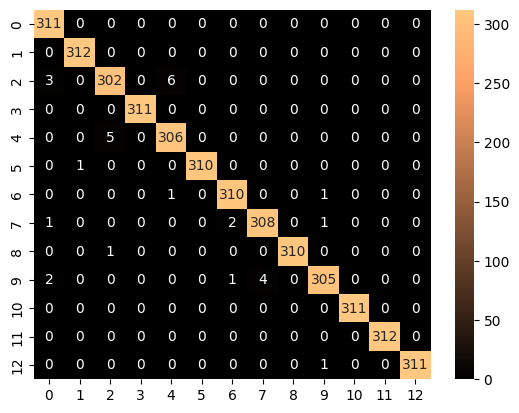

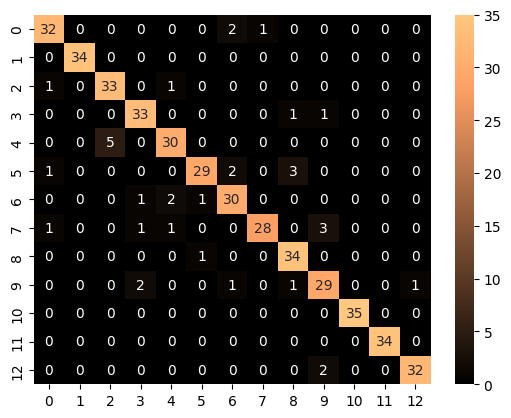

In [30]:
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_ettrain=list()
mmc_ettest=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    ET=ExtraTreesClassifier(random_state=1, )
    ET_model=ET.fit(X_Train, Y_Train)
    predict_ettrain=ET.predict(X_Train)
    predict_ettest=ET.predict(X_Test)
    Acctrain = metrics.accuracy_score(Y_Train, predict_ettrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_ettest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_ettrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_ettest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_ettrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_ettest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_ettrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_ettest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_ettrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_ettest)
    mmmc_train= metrics.matthews_corrcoef(Y_Train, predict_ettrain)
    mmc_ettrain.append(mmc_train)
    mmc_test= metrics.matthews_corrcoef(Y_Test, predict_ettest)
    mmc_ettest.append(mmc_test)
   
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_ettrain))
print("test", metrics.classification_report(Y_Test, predict_ettest)) 
print('Matthews correlation coefficient Train',mean(mmc_ettrain))
print('Matthews correlation coefficient Test',mean(mmc_ettest))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()